In [85]:
import pandas as pd
import numpy as np
import random
import copy
pd.options.mode.chained_assignment = None

meta = pd.read_csv('metadata.csv', sep = '\t', names=["ID", "Class", "Gender"])
primary = pd.read_csv('primaryschool.csv', sep = '\t', names=["Time", "ID1", "ID2", "Class1", "Class2"])
# contact_network = pd.read_csv('primaryschool.csv', sep='\t', lineterminator='\n', names=['Time', 'ID 1', 'ID 2', 'Class 1', 'Class 2']).sort_values(by=['Time'])


primary

,Time,ID1,ID2,Class1,Class2
0,31220,1558,1567,3B,3B
1,31220,1560,1570,3B,3B
2,31220,1567,1574,3B,3B
3,31220,1632,1818,4B,4B
4,31220,1632,1866,4B,4B
...,...,...,...,...,...
125768,148120,1752,1783,1A,1A
125769,148120,1752,1789,1A,1A
125770,148120,1775,1798,1A,1A
125771,148120,1783,1796,1A,1A


In [86]:
N = len(primary["Time"].unique())
print("Unique Time Stamps:", N)
N = len(meta["ID"].unique())
print("Unique IDs in meta", N)

Unique Time Stamps: 3100
Unique IDs in meta 242


In [87]:
#3100 unique time stamps => assume 100 time stamps make 1 day => 31 days (to be able to simulate over 1 month)

In [88]:
primary

,Time,ID1,ID2,Class1,Class2
0,31220,1558,1567,3B,3B
1,31220,1560,1570,3B,3B
2,31220,1567,1574,3B,3B
3,31220,1632,1818,4B,4B
4,31220,1632,1866,4B,4B
...,...,...,...,...,...
125768,148120,1752,1783,1A,1A
125769,148120,1752,1789,1A,1A
125770,148120,1775,1798,1A,1A
125771,148120,1783,1796,1A,1A


In [89]:
primary = primary.sort_values(by=['Time'])
primary['Time'] = ((primary['Time'] - 31220)//2) + 10
primary

,Time,ID1,ID2,Class1,Class2
0,10,1558,1567,3B,3B
1,10,1560,1570,3B,3B
2,10,1567,1574,3B,3B
3,10,1632,1818,4B,4B
4,10,1632,1866,4B,4B
...,...,...,...,...,...
125755,58460,1606,1625,2A,2A
125754,58460,1603,1643,2A,2A
125771,58460,1783,1796,1A,1A
125762,58460,1647,1917,2A,2A


In [90]:
status = ['S' for i in range(N)]
len(status)

242

In [91]:
class SIR_model:
    
    def __init__(self, beta, gamma, start_infected):
        self.beta=beta
        self.gamma=gamma
        self.start_infected=start_infected
    
    def introduce_infection(self, start_infected):
        res = random.sample(range(0, N), start_infected)
        for id in res:
            status[id] = 'I'
#         for i in range(start_infected):
#             infected=random.choice(student_data['ID'])
#             compartment[infected-start_id] = 'I'

    def recovery(self,R,I):
        recoveries = R
        infections = I
        for id in meta['ID']:
            if status[list(meta['ID']).index(id)] == 'I':
                if random.random() < self.gamma:
                    status[list(meta['ID']).index(id)] = 'R'
                    recoveries += 1
                    infections -= 1
        return recoveries, infections
#         recoveries=R
#         infected=I
#         for id in student_data['ID']:
#             if compartment[id-start_id] == 'I':
#                 if random.random()< self.gamma:
#                     compartment[id-start_id] == 'R'
#                     recoveries+=1
#                     infected-=1
#         return recoveries,infected

    def simulate(self):
        self.introduce_infection(self.start_infected)
        R=0
        I=self.start_infected
        S=N-I-R
        X = [S]
        Y = [I]
        Z = [R]
        Time = [0]
        ActualX, ActualY, ActualZ = [], [], []
        ActualTime = []
        i, count = 0, 0
        print(primary.shape[0])
        while i < primary.shape[0]:
            t = Time[-1] + 10
            while i < primary.shape[0] and primary['Time'][i] == t:
                id1 = primary['ID1'][i]
                id2 = primary['ID2'][i]
                if status[list(meta['ID']).index(id1)] == 'S' and status[list(meta['ID']).index(id2)] == 'I':
                    if random.random() < self.beta:
                        S -= 1
                        I += 1
                        status[list(meta['ID']).index(id1)] = 'I'
                elif status[list(meta['ID']).index(id2)] == 'S' and status[list(meta['ID']).index(id1)] == 'I':
                    if random.random() < self.beta:
                        S -= 1
                        I += 1
                        status[list(meta['ID']).index(id2)] = 'I'
                i = i + 1
            if count == 0 or i == primary.shape[0] or (Time[-1] in list(primary['Time']) and i != 0 and i != primary.shape[0] and primary['Time'][i] != primary['Time'][i-1]):
                count += 1
                if count % 100 == 0:
                    ActualX.append(S)
                    ActualY.append(I)
                    ActualZ.append(R)
                    ActualTime.append(count // 100)
#             elif count == 0 or i == primary.shape[0]:
#                 count += 1
            R,I = self.recovery(R,I)

            X.append(S)
            Y.append(I)
            Z.append(R)
            Time.append(t)

        print(count)
        print(ActualX, len(ActualY), ActualZ, ActualTime)
        return ActualX, ActualY, ActualZ, ActualTime        
#         return X, Y, Z, Time

In [92]:
m = SIR_model(
    beta = 1/70, #50 #200 #100 #30 #200
    gamma = 1/1000, #5000
    start_infected = 15 #50 #15
)

X, Y, Z, t = m.simulate()

125773
3100
[225, 219, 210, 185, 168, 141, 116, 107, 98, 92, 85, 79, 63, 53, 47, 47, 47, 47, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44] 31 [1, 2, 3, 5, 12, 21, 32, 42, 48, 59, 72, 80, 90, 94, 102, 186, 186, 187, 188, 188, 188, 189, 189, 191, 192, 193, 193, 194, 194, 196, 196] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


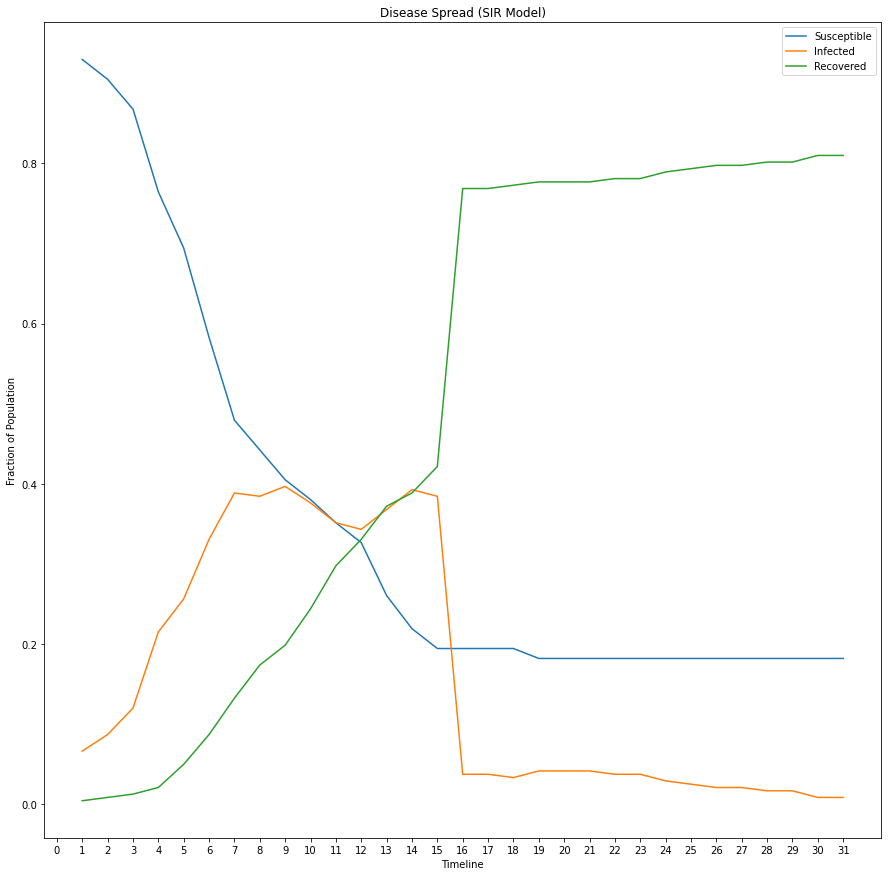

In [93]:
Rate_S = np.array(X)/N
Rate_I = np.array(Y)/N
Rate_R = np.array(Z)/N
time = np.array(t)
# time = np.array(t) / (60 * 24)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.plot(time, Rate_S, label='Susceptible')
plt.plot(time, Rate_I, label='Infected')
plt.plot(time, Rate_R, label='Recovered')
plt.xticks(range(32))
plt.legend()
plt.title('Disease Spread (SIR Model)')
plt.xlabel('Timeline')
plt.ylabel('Fraction of Population')
plt.show()